<a href="https://colab.research.google.com/github/Dreadwolf26/MLBeginnerNotesKindleBook/blob/main/Chapter7Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.1 What is classification

classification is very similiar to regression except instean of predicting continous values, classficatuin is concerned with the prediction of discrete values.

For instance we can use classification alsos to predict whether and email is spam or not spam.

discrete values such as 'spam' 'non-spam' are known as classes.

there are many machine algos for classification commonly used ones include decision tree, random forest, support vector machine (SVM) and logistic regression.

this chapter will discuss three algos decision tree, random forest, and svm.

# 7.2 Decision Tree


Decision trees are some of the most ubiquitous algos in machine learning. The basic concept of **decision tree** is to make classification predictions by tracing through a series of if-else rules in an upside-down tree.

**Training Decision trees**

Consists of iterativelyu splitting the dataset into two subsets based on the rules in the root and decision nodes. The Decision tree deteremines its rules autonomously by computing the level of impurity in each tree node. A node's impurity level is calculated using either tthe **Gini** impurity or **entrophy** impurity. both of which leads to similiar trees in most cases. An imputiry of 0 occurs when all instances in a node belong to the same class. When that happens to node is stated as **pure**

The basic idea behind a decision tree is to; construct one by selecting rules with the smallest impurities.

Using an example below to illustrate a Decssion trees code. This was generated with ChatGPT, but wanted a code to observe before going too deeply into the chapter. Looking at the general formatting of the code that was produced I can make some assumptions about setting up a decsion try, but I wont because the dataset was generated by a built in dataset from sklearn. Im sure there is more of a break down when pulling in information from a CSV file.

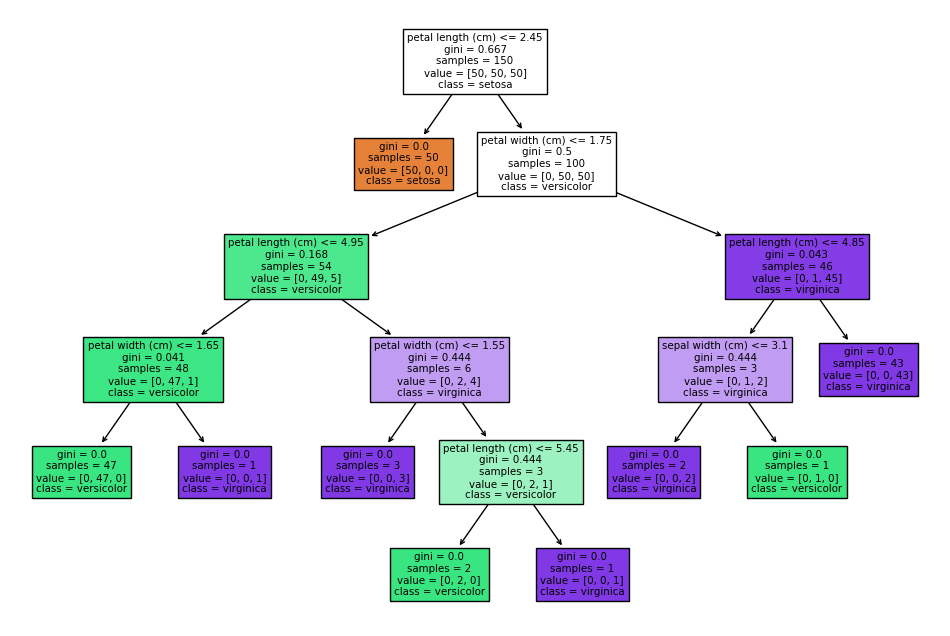

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


Of course skleartn makes us encode non-numerical categories.

This was learn when studying preprocessing in chapter 5. when can use the classes **LabelEncoder** and **OneHotEncoder** and change though non-numerical values into numerical ones to provide input into our machine learning model.

Going back now to the **Gini** Impurity.

**Gini Impurity** = 1 - sum of P(k)$^2$ for all the classes

Where P(k) stands for the proportion of instances that belong to class k in a particular subset.

When the subset is not pure we will contiue to split the decision tree until the **Gini impurity** is pure or if it cannot find a split that would reduce impurity.  


# 7.3 Random Forest


The Decision tree algo is an intuitive algo that is very easy to interpret however a common problem with decision trees is that the tend to be unstanble. A slight change in the dataset can significantly change the trees structure and this makes decision trees relatively inaccurate when making predictions.

One way to resolve this is by using an ensemble of decision trees to make multiple predictions and return the final prediction based on an aggregation function. This approach is called **Random Forest** and is a better alogorithm that gives better performance than a single decision tree.

**The books illistration of a Decision Forest**

Suppose we have a training set with 5 instances, A,B,C,D,E

We can then randomly select 4 instances form the training set to train a decision tree. Next we select another 4 instances to train the second decision tree follow by another 4 and so on.

Instances can be selected with or without replacement. Selecting a replacement means an instance may be chosen more than once for the same decision tree. To explain further say for the first training set we use A,B,E and A you see A is used twice in the training of the decision tree this selection process is called **bagging** (short for bootstrap aggregation) and is the default process used in sklearn. Selecting without replacement means that yoiu cannot use the same training set twice within the decision tree this is called **pasting**

After we select the instances and train the trees, we can use them to predict the class of a new instance. The most frequent predicted class is typically chosen as the final prediction.

For example: predictions are class: 1,1,2 and 1; the final prediction is class 1 since it was most frequent.

**One significant difference between the Random Forest and Decision Tree algo**

is that the former does not consider all the features in our dataset when splitting a node. Instead it searches for the best feature among a random subset of features. For instance, if our dataset has 16 features it may randomly consider 4 features to choose the best split. The randomness leads to greater diversity in the trees, which generally results in a better performing model.

# 7.4 Decision Tree and Random Forest with Scikit-Learn

**Building a Decision tree model with Data from a CSV**

In [2]:

import pandas as pd
df = pd.read_csv('diabetes.csv')

#examining the csv data
df.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [3]:
#Check if there are any null values in the dataset
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [4]:
# Splitting the dataset into input features (X) and target variable (y)
# Utilizing integer-based location indexing to access specific rows and columns
# With iloc method, the first : selects all columns except for the last one
# :-1 selects all elements counting backwards except the last one, effectively excluding the last column
X = df.iloc[:,:-1].to_numpy()  # Converting the selected DataFrame portion into a NumPy array for input features (X)
y = df.iloc[:, -1].to_numpy()   # Converting the last column of the DataFrame into a NumPy array for the target variable (y)

from sklearn.model_selection import train_test_split

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [5]:
#fitting the data
from sklearn.tree import DecisionTreeClassifier

#instantiating the class
#random state 0 controls the randomness of the decision tree
clf = DecisionTreeClassifier(random_state=0)

#fitting our training data to the model.
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

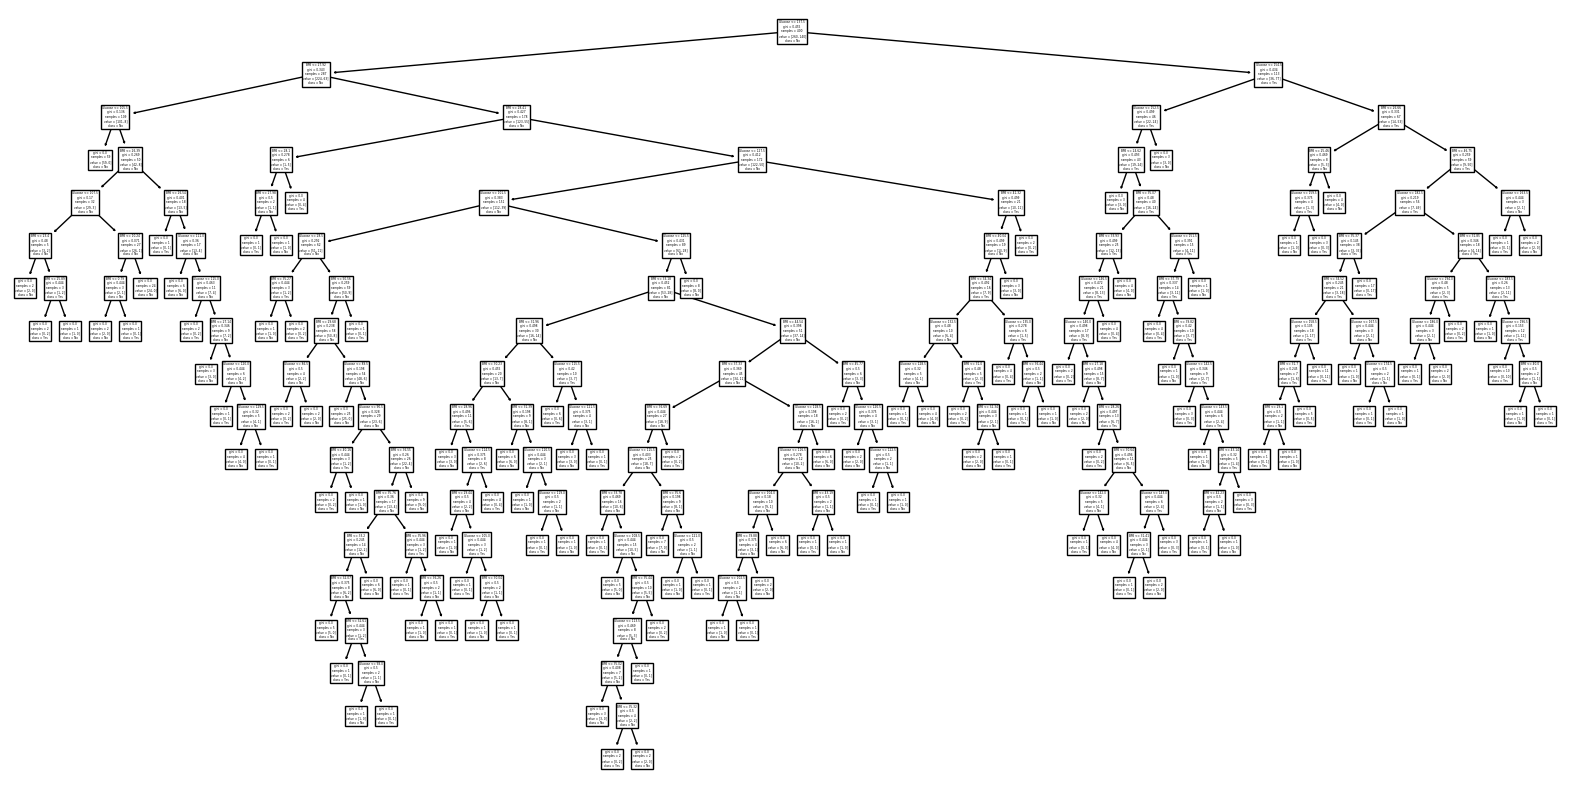

In [6]:
#plotting the tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No', 'Yes'])
plt.show()



**Code above Explained**

We pass the tree classifier (clf) to the plot tree and two params **feature_names** and **class_names** to the function.

**feature_names**

Stores the names of the features (column names) in the dataset and is passed as a list of string, sorted based on order of columns in the dataset.

**class_names**

This is also passed as a list of strings. These names correspond to the class in the dataset, sorted in ascending numerical order. This is because the outcome is in numerical data 0 = 'NO' and 1 = 'Yes' if the individual has diabetes or not.

**tree size**

The tree displayed above is clearly too learge we are unable to even read it this would because because there is a high chance that this model has been over fitted. When this happens our model is likely to not generalize well when new data comes in.

**preventing overfitting**

To prevent overfitting we can use a hyper param **max_depth** when instantiating the the tree object.

**Hyperparameter**

Referes toi a parameter whos vcalue is specified by us when we traing our models.

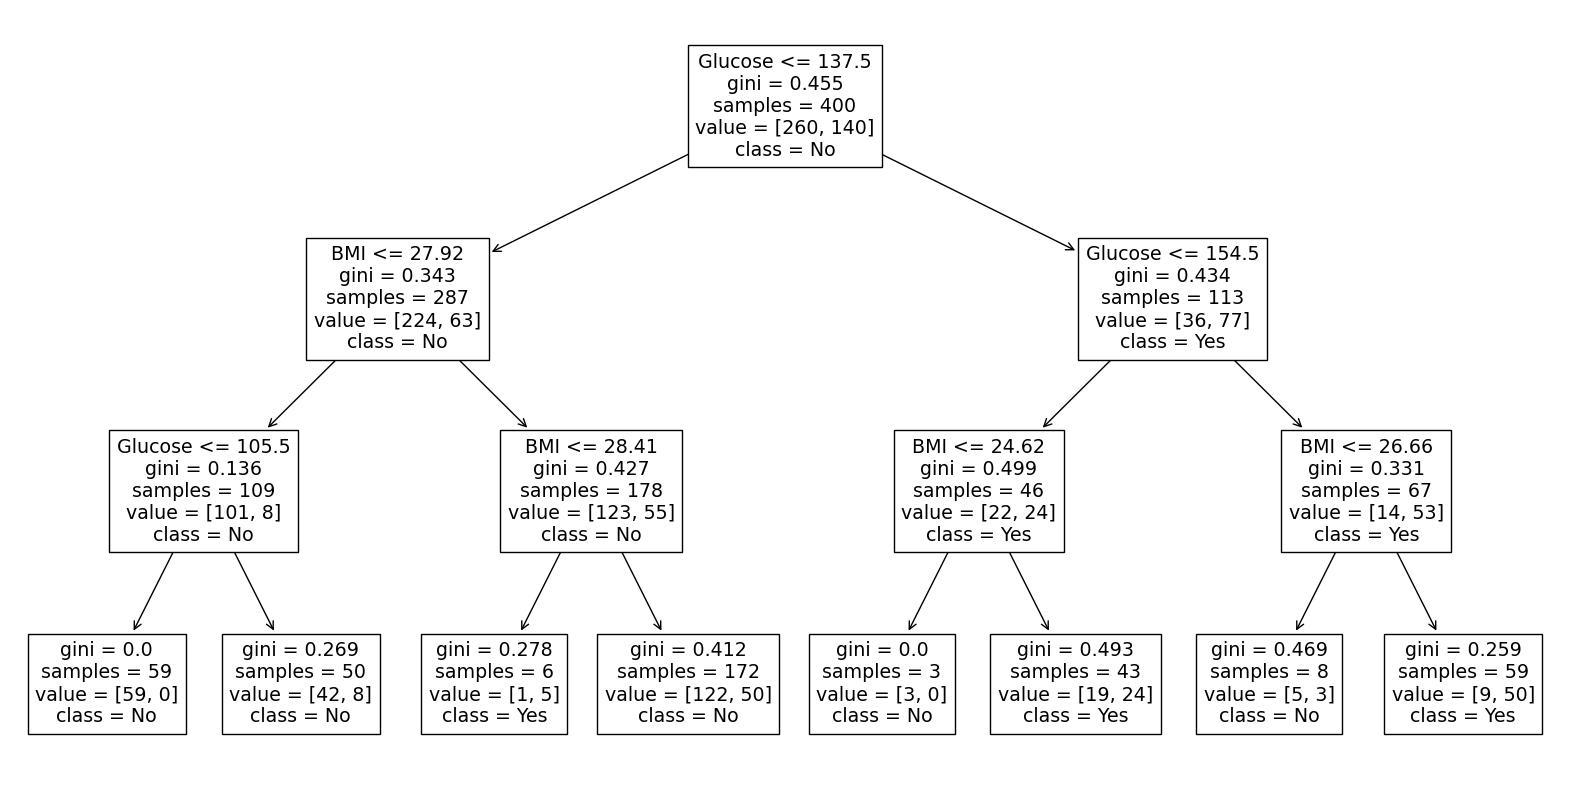

In [7]:
#since we have already instantiated the object previously we can use .set_params to add the hyper parameter

clf.set_params(max_depth=3)

#IMPORTANT NOTE YOU HAVE TO FIT THE MODEL BEFORE THE NEW PARAMS WILL TAKE.
clf.fit(X_train, y_train)

#after setting the max depth hyperparam we traing again.

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No', 'Yes'])
plt.show()

In [8]:
#predicting with our model
#the values called here is for Glucose and BMI respectively there is two sets of data
#two sets is used to satisfy the left branch of the tree and the right
clf.predict([[90,20], [200,30]])

array([0, 1])

The values on the output displayed above predict the outcome based on the input of information in our predict() method. 0 meaning no and 1 meaning yes.

In [9]:
# Performing cross-validation to evaluate the performance of a classifier
# Importing the necessary module for cross-validation
from sklearn.model_selection import cross_val_score

# Using cross_val_score to perform cross-validation
# clf: The classifier object to be evaluated
# X_train: The input features for training
# y_train: The corresponding target labels for training
# cv=5: Specifies 5-fold cross-validation, dividing the dataset into 5 equal parts for training and testing
# scoring='accuracy': Using accuracy as the evaluation metric to assess the performance of the classifier
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculating the mean accuracy across all cross-validation folds
accuracy = scores.mean()

# Returning the mean accuracy as the result of cross-validation
accuracy


0.7125

You can see the above has an accuracy of 0.7125 or 71.25%

Next we will try with a random forest model to test its accuracy

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 200, max_depth=3, random_state=0)

clf_rf.fit(X_train, y_train)

scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='accuracy')
accuracy = scores.mean()
accuracy

0.725

You can see in the aboive code cell that we have improved upon the model but only slightly from 0.7125 to 0.725 or 71.25% and 72.5% respectively.

# 7.5 Support Vector Machine

**Support Vector MAchine (SVM)**

Is one of the most powerful and versatile machine learning algos for both classification and regression problems.

The focus will be on classification.

**7.5.1 Binary Classification**

Binary classification refers to the task of classifying instances into two classes.

To perform Binary Classification the SVM algo tries toi find a boundary (also known as a hyperplane) that seperates the two instances into two classes, so that the boundary is as far away from the closest trai'ning instances possible

As an example lets look at the figure below:

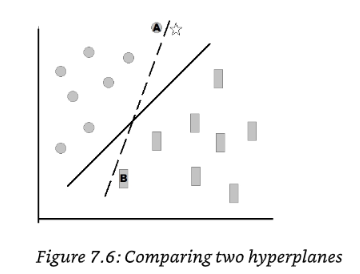

Both hyperplanes seperate the circles and the rectangles correctly. However the dotted line is very close to circle A and rectangle B and will liklely not generalize well with the data. For instances if we add an unknown shape represented by the star above the dotted line will classify it as a rectangle. Were as the solid line would classify it as a circle, which we know visually is closest to a circle.

The **SVM** algo works by finding a hyperplane that maximizes the distance between the plane and the closest data points. These data points are known as **support vectors** and the distance between two classes support vectors are known as a margin.

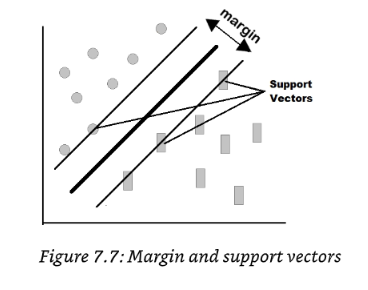

In the figure above our data was linearly seperable (Points that can be seperated by a linear line) If the data was more convoluted and a straight line could not represent the two classes well then we would need to use a **non-linear SVM model**.


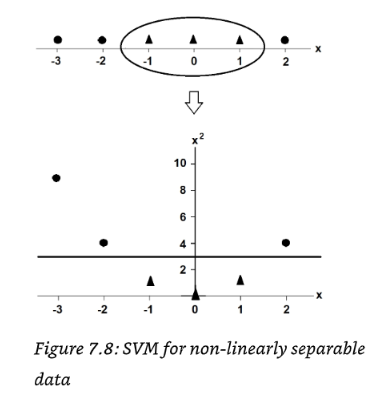

In the figure above the dataset on top (represented by x) is not seperable by a linear line hoewever we can map it in a 2D space. Adding a new diminsion $x^2$ to it, example: the first data point x = -3 can be mapped to x = -3 and $x^2$ = 9 When we do that the dataset becomes linearly seperable.

To map ourdataset to a higher level we need to use whats known as a **kernel trick**

**kernel trick**

Is a hyperparametere that we pass to the SVM model when instantiating it.

The avialble kernels are:

- 'linear'
- 'poly'
- 'rbf'
- 'sigmoid'
- 'precomputed'

The defualt is 'rbj'

These kernels will be discussed future below when we traing the model.

***7.5.2 Multi-class Classification**

Before we can attempt to train the model we need to understand a few things mainly on how we can use **SVM** for multiclass classification.

The **SVM** algo is fundamentally a binary classifier. This means it is only able to classify instances into two classes.

If we cant to use a binary classifier to classify multiple classes we can use one of the two listed methods below with explaination:

**One-vs-Rest (OvR)**

Suppose we classify our dataset into three classes 1,2, and 3 the **OvR** method splits the problem into the following classification problems:

- Class-1 vs. Not-Class-1 (Example Class-2 and Class-3 are combined into Not-Class-1)
- Class-2 vs. Not-Class-2
- class-3 vs. Not-class-3

A binary classifier is then trained on each problem and a decision score is generated for each. The highest classifier score is selected.

**One-vs-One (OvO)**

This method invloves training a binary classifier for each pair of classes and selecting the class with the most votes.

The classifiers would classify as:

- Class-1 vs. Class-2
- Class-1 vs. Class-3
- Class-2 vs. Class-3

The first classifier predicts that an instances belongs to Class-2 and the second predicts is belong to Class-1 and the third predicts Class-2. We would then select the classifier with the highest decision score. In case of a tie the **OvO** method use a decision function based on the confidence levels of an underlying binary classifiers to make the prediction.

sklearn provides two classes:

- **OnevsOneClassifier**
- **OnevsRestClassifier**

In most cases there is no case to run these explicitelly. When sklearn detects that we are trying to predict multiple classes using a binary classification algo it automatically runs one of the two methods for us depending on the algo.

For instance running the **SVM** to classify multiple classes sklearn will use the **OvO** method this allows the algo to work seamlessly with multi-class classification problems.

# 7.6 SVM with Scikit-Learn

**training a SVM model**

To do so we us the **SVC (Support Vector Classification)** in the sklearn.svm module

**SVM** requires input features of our dataset to lie in the same scale. So we will use pipeline to scale out features before passing them to the **SVC** estimator.

See code example below:



In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#instantiating the classes
scaler = ('scaler', StandardScaler())
clf_svc=('SVM', SVC(kernel='rbf', random_state=0))
pipeline = Pipeline = Pipeline([scaler,clf_svc])
#training the model
pipeline.fit(X_train, y_train)
#predicting the model
pipeline.predict([[90,20], [200,30]])


array([0, 1])

In [15]:
#testing for accuracy
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
accuracy = scores.mean()
accuracy

0.745

In [16]:
#testing with the test set
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.74

You can see that the score between the test set and the training set are very close. This means that the **SVM** model generalizes well to the test set.